**Business Goal:**
We offer the Free Trial program for customers with 2 type of UI design. We concern that which type of UI can make users purchased the FT program. So we conduct an A/B testing 

**Target Customers:**
Segmentation of customers that have UI pageviews. 


1. How to define the sample size? 
2. What are the success metrics? 
3. Which type of hypothesis testing model should be choose? 
4. Whether the result is significant? 
5. Whether the result is practical significant? 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings ('ignore')

## 1. Read & Understand data:

In [47]:
#Read data: 
df = pd.read_csv('/Users/nguyenngockimnhu/Downloads/bquxjob_7ae7efd5_17ff7b02aa0.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30049 entries, 0 to 30048
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   customer_id       30049 non-null  int64
 1   free_trial_group  30049 non-null  int64
 2   converted         30049 non-null  int64
dtypes: int64(3)
memory usage: 704.4 KB


,customer_id,free_trial_group,converted
count,3.004900e+04,30049.000000,30049.000000
mean,9.102330e+06,1.499983,0.318014
std,7.249900e+06,0.500008,0.465713
min,5.500000e+01,1.000000,0.000000
25%,1.634794e+06,1.000000,0.000000
50%,7.973345e+06,1.000000,0.000000
75%,1.416212e+07,2.000000,1.000000
max,2.508438e+07,2.000000,1.000000


<AxesSubplot:xlabel='free_trial_group'>

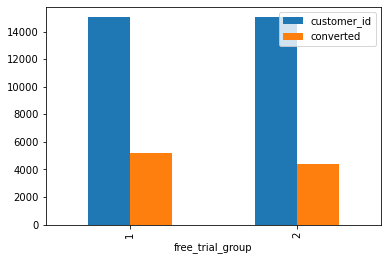

In [63]:
#Create a sub table & Visualize Data: 
count_tb = df.groupby('free_trial_group')[['customer_id']].nunique().reset_index()
count_converted_tb = df.groupby('free_trial_group')[['converted']].sum().reset_index()
count_all_tb= count_tb.merge(count_converted_tb, on = 'free_trial_group', how = 'left')
count_all_tb.plot(x="free_trial_group",y=['customer_id','converted'], kind = 'bar')

* As the histogram show that 2 groups have a litte fimilar (though group 1 is higher than group 2) in the converted. 
* Need to testing whether 2 CRs are different or not 

In [65]:
#Get conversion rate between 2 group: 
group1 = df[df['free_trial_group'] == 1]
group2 = df[df['free_trial_group'] == 2]

group1_converted_rate = (group1['converted'].sum())/(group1['converted'].count())*100
group2_converted_rate = (group2['converted'].sum())/(group2['converted'].count())*100

print('Conversion rate of users in group 1 is:',round(group1_converted_rate,2),'%')
print('Conversion rate of users in group 2 is:',round(group2_converted_rate,2),'%')

Conversion rate of users in group 1 is: 34.6 %
Conversion rate of users in group 2 is: 29.0 %


## 2. Apply Testing Method:

### Frequentist Approach: Chi-Square Test

With Chi-square model, we want to test the relationship between 2 groups. 

* H-null: There is no differnce between 2 groups 
* H-alter: There is a difference between 2 groups


In [66]:
#Create a contigency table (bảng tương quan)

group1__non_converted = group1.loc[group1['converted'] == 0]['converted'].count()
group2__non_converted = group2.loc[group2['converted'] == 0]['converted'].count()

group1__converted = group1.loc[group1['converted'] == 1]['converted'].count()
group2__converted = group2.loc[group2['converted'] == 1]['converted'].count()

contingency_table = np.array([[group1__converted,group1__non_converted],
                              [group2__converted,group2__non_converted]])
# contingency_table = np.array([[3450,225],[3000,250]])
contingency_table

array([[ 5199,  9826],
       [ 4357, 10667]])

In [67]:
from scipy.stats import chi2_contingency


In [68]:
chi, p_value, _, _= chi2_contingency(contingency_table,correction = True)
p_value<0.05


True

* Because p-value < 0.05, we can reject H-null. There is a difference between 2 
groups.

**>>> We can conclude that group 1 is perform better than group 2**